<a href="https://colab.research.google.com/github/vpenumar/Deeplearning-models/blob/master/TimeseriesA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [0]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [0]:
data = pd.read_excel('Superstoredata.xls')

In [0]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [0]:
furniture = data.loc[data['Category'] == 'Furniture']

In [0]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [0]:
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-13', '2014-01-14', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2017-12-28', '2017-12-28', '2017-12-28', '2017-12-29',
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [0]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940


In [0]:
Mean_furn = furniture.rolling(window=30).mean()

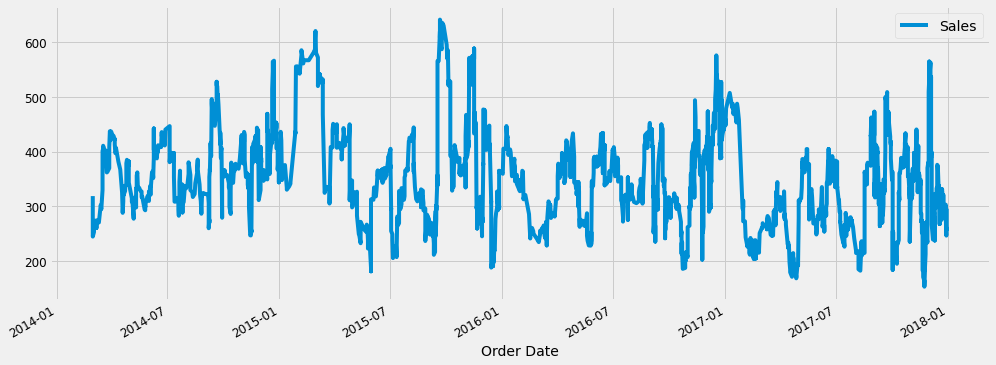

In [0]:
import matplotlib.pyplot as plt
Mean_furn.plot(figsize=(15, 6))
plt.show()

In [0]:
y = furniture['Sales'].resample('MS').mean()

In [0]:
y.head()

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
Freq: MS, Name: Sales, dtype: float64

In [0]:
y['2017':]

Order Date
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    206.044502
2017-05-01    319.953928
2017-06-01    372.717386
2017-07-01    227.173500
2017-08-01    395.945487
2017-09-01    349.737422
2017-10-01    308.226313
2017-11-01    374.310253
2017-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64

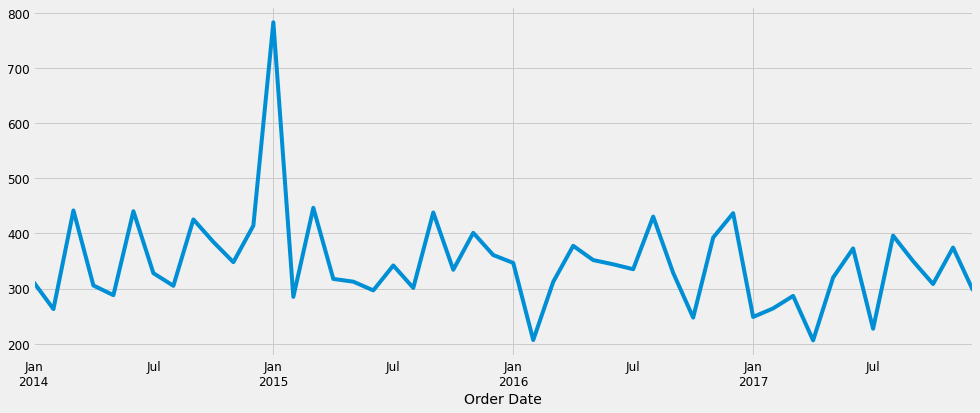

In [0]:
import matplotlib.pyplot as plt
y.plot(figsize=(15, 6))
plt.show()

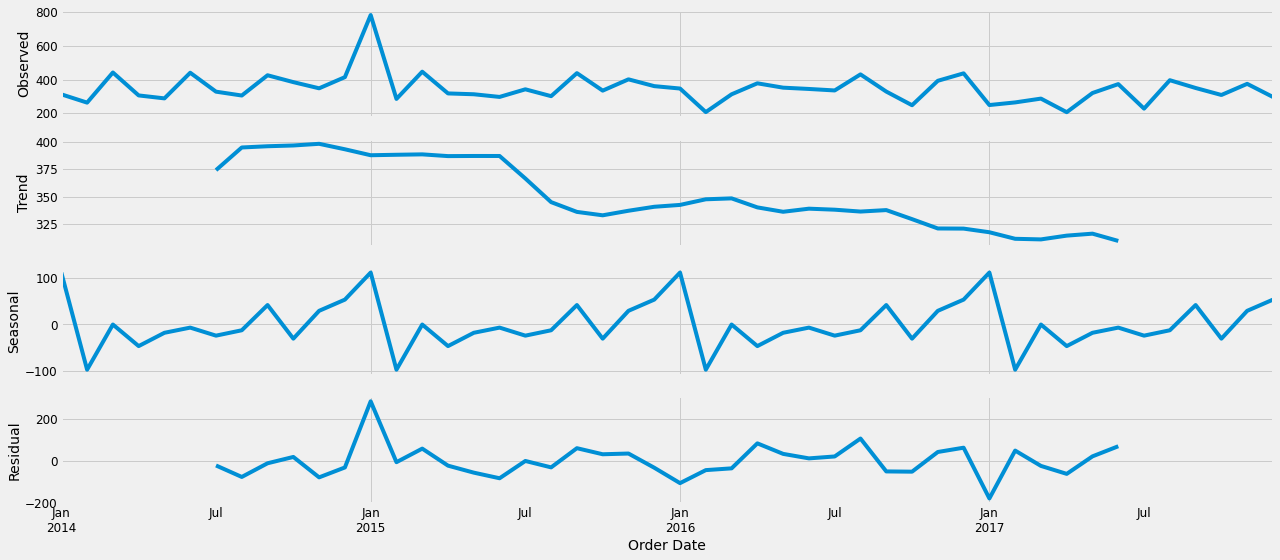

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [0]:
a = decomposition.seasonal
b = decomposition.trend
c = decomposition.resid
d = decomposition.observed

In [0]:
a

Order Date
2014-01-01    110.679166
2014-02-01    -96.521800
2014-03-01     -0.178251
2014-04-01    -46.180712
2014-05-01    -17.789778
2014-06-01     -6.753504
2014-07-01    -23.888871
2014-08-01    -12.417871
2014-09-01     41.373203
2014-10-01    -30.332362
2014-11-01     29.051540
2014-12-01     52.959240
2015-01-01    110.679166
2015-02-01    -96.521800
2015-03-01     -0.178251
2015-04-01    -46.180712
2015-05-01    -17.789778
2015-06-01     -6.753504
2015-07-01    -23.888871
2015-08-01    -12.417871
2015-09-01     41.373203
2015-10-01    -30.332362
2015-11-01     29.051540
2015-12-01     52.959240
2016-01-01    110.679166
2016-02-01    -96.521800
2016-03-01     -0.178251
2016-04-01    -46.180712
2016-05-01    -17.789778
2016-06-01     -6.753504
2016-07-01    -23.888871
2016-08-01    -12.417871
2016-09-01     41.373203
2016-10-01    -30.332362
2016-11-01     29.051540
2016-12-01     52.959240
2017-01-01    110.679166
2017-02-01    -96.521800
2017-03-01     -0.178251
2017-04-01    

In [0]:
import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf

In [0]:
y.describe()

count     48.000000
mean     346.478737
std       89.859062
min      206.044502
25%      300.079303
50%      334.581553
75%      386.478409
max      782.662773
Name: Sales, dtype: float64

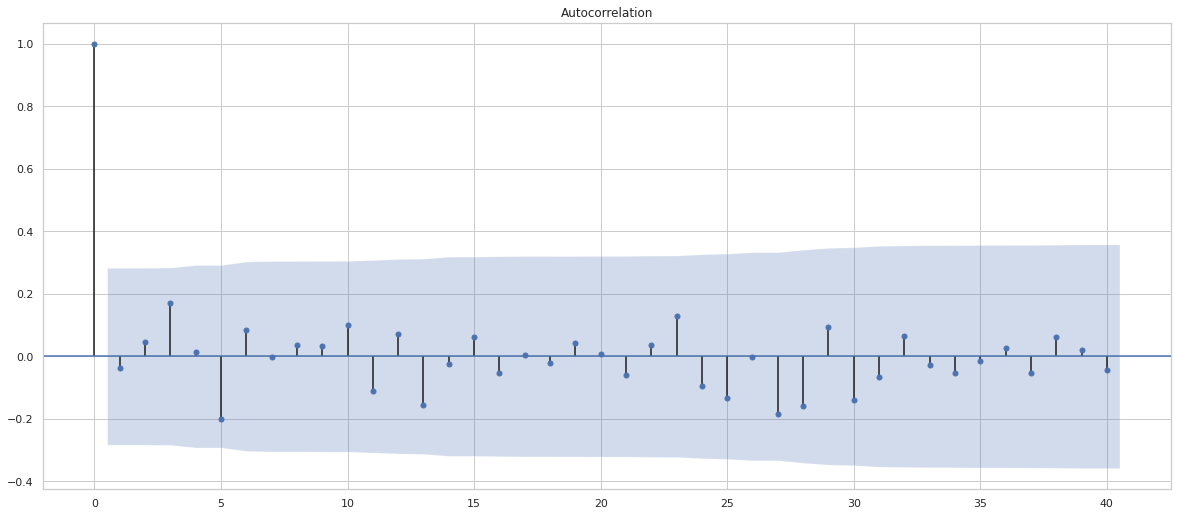

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
acf_plot = plot_acf(y, lags = 40, alpha=0.05)

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
p = d = q = range(0, 2)

In [0]:
pdq = list(itertools.product(p, d, q))

In [0]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [0]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [0]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{} BIC:{}'.format(param, param_seasonal, results.aic, results.bic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:688.3112416991725 BIC:690.1613893008825
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1775.22395961098 BIC:1778.334655733959
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:426.20464898591723 BIC:427.75999704740667
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8238602501692 BIC:455.99089812708144
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:421.17561100533385 BIC:425.8416551898021
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.446456472235 BIC:297.8025641329309
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.1240680665852 BIC:644.7813508595634
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2819.0048727295152 BIC:2823.5839543033635
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.5496453364602 BIC:419.6023663856925
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.11628880659146 BIC:459.8668456219598
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:411.57923671255463 BIC:417.6846788110193
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.446406625009 BIC:300.98056811605284
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:580.6389269668506 BIC:582.4675683

In [0]:
mod5 = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results5 = mod5.fit()
print(results5.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.259     -0.298      0.766      -0.584       0.430
ma.L1         -1.0000      0.434     -2.305      0.021      -1.850      -0.150
ar.S.L12      -0.0007      0.029     -0.025      0.980      -0.057       0.056
sigma2      6323.9741   6.86e-05   9.22e+07      0.000    6323.974    6323.974


In [0]:
mod1 = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results1 = mod1.fit()
print(results1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -9.0928      2.459     -3.697      0.000     -13.913      -4.273
ma.L1      -4075.5643    849.227     -4.799      0.000   -5740.018   -2411.110
ma.S.L12    1.761e+14   1.96e-08   8.99e+21      0.000    1.76e+14    1.76e+14
sigma2      4.564e+08      0.004    1.2e+11      0.000    4.56e+08    4.56e+08


In [0]:
mod2 = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results2 = mod2.fit()
print(results2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0948      0.375      0.253      0.800      -0.639       0.829
ma.L1         -0.7660      0.210     -3.644      0.000      -1.178      -0.354
sigma2      1.394e+04   2562.898      5.439      0.000    8916.550     1.9e+04


In [0]:
mod3 = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results3 = mod3.fit()
print(results3.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3252      0.084      3.877      0.000       0.161       0.490
ma.L1         -1.0000      0.336     -2.979      0.003      -1.658      -0.342
ar.S.L12       0.2611      0.080      3.279      0.001       0.105       0.417
sigma2      4061.6796   8.26e-05   4.92e+07      0.000    4061.679    4061.680


In [0]:
mod4 = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results4 = mod4.fit()
print(results4.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1        -12.6884      1.723     -7.365      0.000     -16.065      -9.312
ma.L1      -4078.3391    822.829     -4.956      0.000   -5691.054   -2465.624
ar.S.L12     -11.4405    127.540     -0.090      0.929    -261.414     238.534
ma.S.L12    1.237e+14   2.39e-08   5.18e+21      0.000    1.24e+14    1.24e+14
sigma2      4.563e+08      0.003   1.31e+11      0.000    4.56e+08    4.56e+08


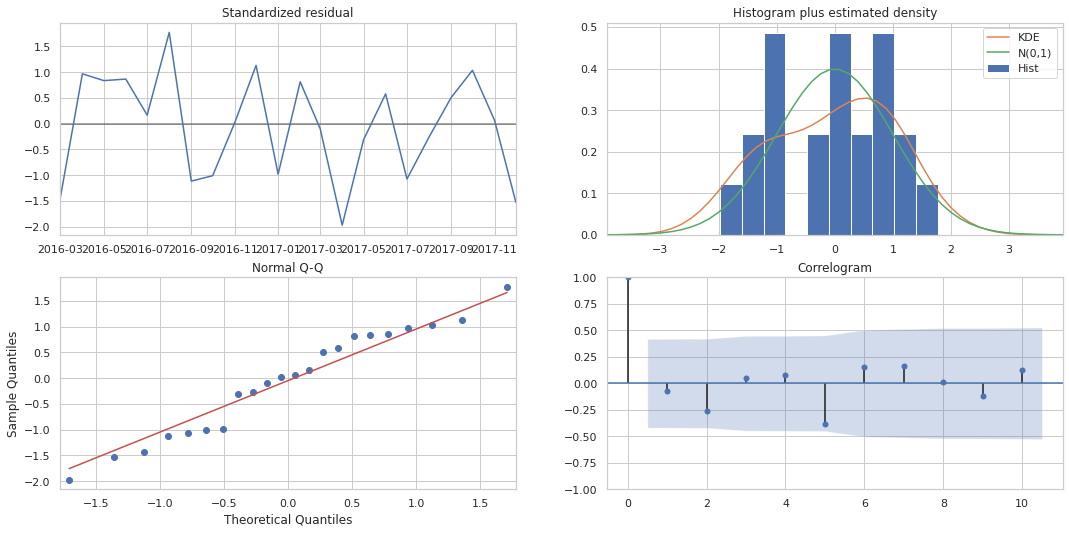

In [0]:
results5.plot_diagnostics(figsize=(16, 8))
plt.show()

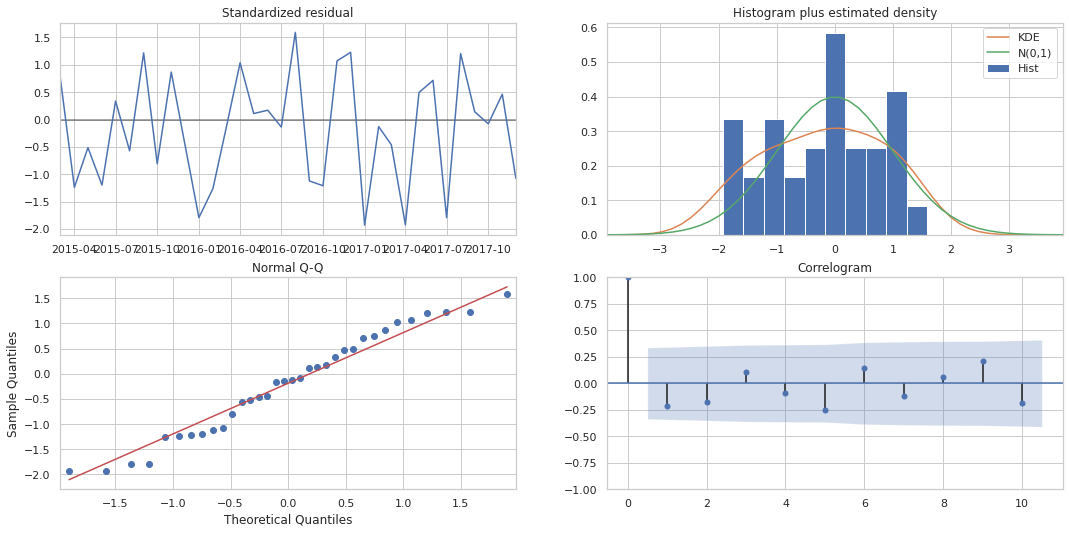

In [0]:
results3.plot_diagnostics(figsize=(16, 8))
plt.show()

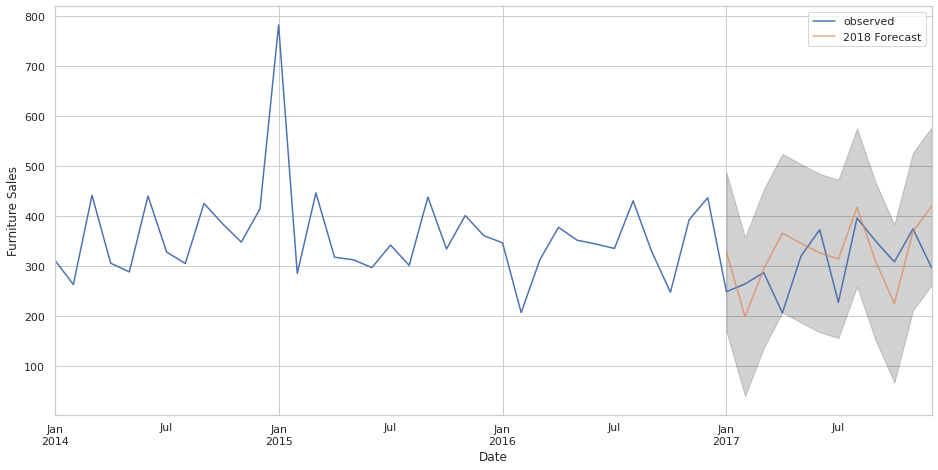

In [0]:
pred = results5.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='2018 Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5911.26


In [0]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 76.88


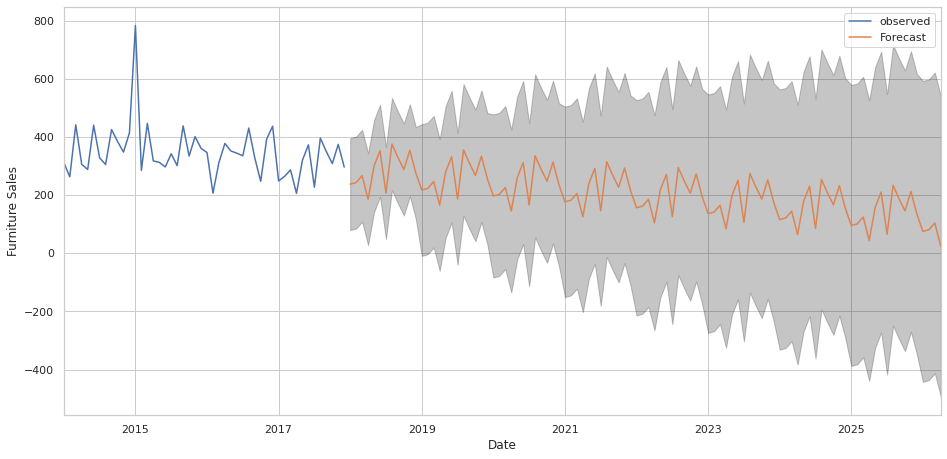

In [0]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()